In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gmaps
import statsmodels.api as sm

In [64]:
post_secondary_csv = pd.read_csv("post_sec_data_clean.csv")
post_secondary_df = pd.DataFrame(post_secondary_csv)

home_ownership_csv = pd.read_csv("Homeownership_ACS.clean")
home_ownership_df = pd.DataFrame(home_ownership_csv)

In [65]:
home_ownership_df = home_ownership_df[["County", "HOR"]]
post_secondary_df = post_secondary_df[["county","counts"]]
post_secondary_df  = post_secondary_df.rename(columns={"counts": "school_counts"})
home_ownership_df  = home_ownership_df.rename(columns={"County": "county"})

In [66]:
home_ownership_df.head()

,county,HOR
0,"Autauga, AL",73.3
1,"Baldwin, AL",72.9
2,"Barbour, AL",62.5
3,"Bibb, AL",75.4
4,"Blount, AL",78.5


In [67]:
post_secondary_df.head()

,county,school_counts
0,"Los Angeles, CA",228
1,"Cook, IL",125
2,"Maricopa, AZ",92
3,"New York, NY",91
4,"Miami-Dade, FL",88


In [68]:
sample_home_ownership = home_ownership_df.sample(n=1400)
sample_home_ownership = sample_home_ownership.reset_index(drop=True)
sample_home_ownership.head()

,county,HOR
0,"Woodford, IL",82.6
1,"Dearborn, IN",79.1
2,"Colorado, TX",82.1
3,"Aiken, SC",72.3
4,"Doña Ana, NM",62.7


In [69]:
post_sec_analysis = sample_home_ownership.merge(post_secondary_df, on="county")
post_sec_analysis.head()

,county,HOR,school_counts
0,"Woodford, IL",82.6,1
1,"Aiken, SC",72.3,4
2,"Doña Ana, NM",62.7,5
3,"Washington, RI",73.3,1
4,"Gilmer, WV",74.3,1


In [70]:
len(post_sec_analysis)

617

## Analysis

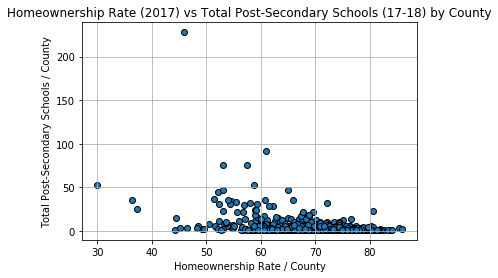

In [71]:
plt.scatter(post_sec_analysis["HOR"], post_sec_analysis["school_counts"], marker="o", edgecolor='black')
plt.title("Homeownership Rate (2017) vs Total Post-Secondary Schools (17-18) by County")
plt.xlabel("Homeownership Rate / County")
plt.ylabel("Total Post-Secondary Schools / County")
plt.grid(True)
plt.savefig('Pictures/Post_sec_scatter.png')

In [72]:
x = post_sec_analysis["HOR"]
y = post_sec_analysis["school_counts"]
model = sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          school_counts   R-squared (uncentered):                   0.120
Model:                            OLS   Adj. R-squared (uncentered):              0.119
Method:                 Least Squares   F-statistic:                              84.07
Date:                Sat, 07 Sep 2019   Prob (F-statistic):                    7.08e-19
Time:                        13:32:46   Log-Likelihood:                         -2453.7
No. Observations:                 617   AIC:                                      4909.
Df Residuals:                     616   BIC:                                      4914.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HOR            0.0692      0.008      9.169      0.000       0.054       0.084
==============================================================================
Omnibus:                     1038.476   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           615299.439
Skew:                          10.193   Prob(JB):                         0.00
Kurtosis:                     156.357   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#make a headt map